# 6.5 池化层
- **目录**
  - 6.5.1 最大池化层和平均池化层
  - 6.5.2 填充和步幅
  - 6.5.3 多个通道


- 通常处理图像时，希望逐渐**降低**隐藏表示的空间分辨率,聚集信息.

- 这样随着神经网络中层叠的上升，每个神经元对其敏感的感受野（输入）就越大。

- 此句话详解如下：

  - 在神经网络中，随着层数的增加，每个神经元能够获取并处理的输入信息范围（感受野）会变得越来越大。换句话说，更深层的神经元可以捕获到输入数据中**更广泛的上下文信息**。
  
  - 在卷积神经网络（CNN）中，每一层都学习从上一层输入中提取特征。在较低层（接近输入数据），神经元通常关注局部特征，如边缘和纹理等，它们的感受野相对较小。
  - 但随着网络层数的增加，每个神经元开始**整合前面层中的更多信息**，从而形成**更高级别和更抽象**的特征表示。

- 机器学习任务通常会跟**全局图像的问题**有关（例如，“图像是否包含一只猫呢？”），所以最后一层的神经元应该对整个输入的**全局敏感**。
- 通过逐渐聚合信息，生成越来越粗粒度的映射，最终实现**学习全局表示的目标**，同时将卷积图层的所有优势保留在中间层。

- 此外，当检测较底层的特征时（例如 6.2节中所讨论的边缘），我们通常希望这些特征保持某种程度上的**平移不变性**。

  - 例如，如果我们拍摄黑白之间轮廓清晰的图像`X`，并将整个图像向右移动一个像素，即`Z[i, j] = X[i, j + 1]`，则新图像`Z`的输出可能大不相同。
  
  - 在现实中，随着拍摄角度的移动，任何物体几乎不可能发生在同一像素上。即使用三脚架拍摄一个静止的物体，由于快门的移动而引起的相机振动，可能会使所有物体左右移动一个像素（除了高端相机配备了特殊功能来解决这个问题）。
 
- **要点：**
  - **逐渐降低空间分辨率**：在神经网络中，尤其是卷积神经网络（CNN），随着神经元层次的增加，隐藏层表征的空间分辨率会逐步降低，同时聚合更多的信息。
  - **感受野的扩大**：随着网络层次的加深，每个神经元的感受野（能够获取和处理的输入信息范围）会逐渐增大，使得神经元能够捕获到输入数据中的更广泛上下文信息。
  - **从局部到全局特征**：在较低的网络层次，神经元倾向于关注局部特征，如边缘和纹理。随着层次的加深，神经元开始整合前面层的信息，形成对整个输入全局更敏感的高级和抽象特征表示。
  - **目标是学习全局表示**：机器学习任务往往与全局图像相关，例如判断图像是否包含某个物体。通过聚合信息，生成粗粒度的映射，最终层的神经元应对整个输入敏感，实现全局表示的学习目标。
  - **平移不变性的期望**：特别是在检测低层次的特征（如边缘）时，希望这些特征具备一定的平移不变性，意味着即便输入图像平移，输出的识别结果也应该保持一致性。

- 本节将介绍**池化（pooling）层**（简体中文教材大部分翻译成“**池化层**”），它具有双重目的：
  - **降低卷积层对位置的敏感性**。
  - **降低对空间降采样表示的敏感性**。

## 6.5.1 最大池化层和平均池化层

- 与卷积层类似，池化层运算符由一个固定形状的窗口组成，该窗口根据其步幅大小在输入的所有区域上**滑动**，为固定形状窗口（有时称为**池化窗口**）遍历的每个位置计算一个输出。

- 不同于卷积层中的输入与卷积核之间的互相关计算，**池化层不包含参数**。

- 池运算是确定性的，它通常计算池化窗口中所有元素的最大值或平均值，分别称为**最大池化层(maximum pooling)**和**平均池化层(average pooling)**。

- 在这两种情况下，与互相关运算符一样，**池化窗口从输入张量的左上角开始，从左往右、从上往下的在输入张量内滑动**。
- 在池化窗口到达的每个位置，它计算该窗口中输入子张量的最大值或平均值。
  - 计算最大值或平均值是取决于使用了最大池化层还是平均池化。
<center>
    <img src="../img/pooling.svg" alt="一个单隐藏层的多层感知机，具有5个隐藏单元">
</center>
<center>
    图6.5.1 池化窗口形状为$2\times 2$的最大池化层
  - 着色部分是第一个输出元素，以及用于计算这个输出的输入元素: $\max(0, 1, 3, 4)=4$
</center>
- 图6.5.1中的输出张量的高度为$2$，宽度为$2$。这四个元素为每个池化窗口中的最大值：
$$
\max(0, 1, 3, 4)=4,$$
$$\max(1, 2, 4, 5)=5, \tag{6.5.1}$$
$$\max(3, 4, 6, 7)=7,$$
$$\max(4, 5, 7, 8)=8.
$$

- 池化窗口形状为$p \times q$的池化层称为<b>$p \times q$池化层</b> ，池化操作称为$p \times q$池化。

- 回到本节开头提到的对象边缘检测示例，现在将使用卷积层的输出作为$2\times 2$最大池化的输入。
- 设置卷积层输入为`X`，池化层输出为`Y`。
- 无论`X[i, j]`和`X[i, j + 1]`的值相同与否，或`X[i, j + 1]`和`X[i, j + 2]`的值相同与否，池化层始终输出`Y[i, j] = 1`。
- 即**使用$2\times 2$最大池化层，即使在高度或宽度上移动一个元素，卷积层仍然可以识别到模式**。

- 在下面的代码中的`pool2d`函数，**实现池化层的前向传播**。
  - 这类似于 6.2节中的`corr2d`函数。
  - 然而，此处没有卷积核，输出为输入中每个区域的最大值或平均值。

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

In [24]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    ## 这种嵌套循环迭代的计算方式，性能肯定很低
    ## 而且这里的池化层的步幅是（1,1）
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

- 构建 图6.5.1中的输入张量`X`，验证二维最大池化层的输出。

In [25]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

- 验证平均池化层。


In [26]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

-------------

- **说明：torch图像处理中通道维度的重排**
  - Tensorflow、opencv和matplotlib的图片张量，通道都是在第3维。
  - Pytorch的单张图像的通道维在第1维（如果是批量数据，则在第2维）。
  - 通过matplotlib显示Pytorch图片张量时需要进行维度重排（或者轴转换），即将通道维从第1维重排到第3维。

p的原始形状 (910, 690, 3)


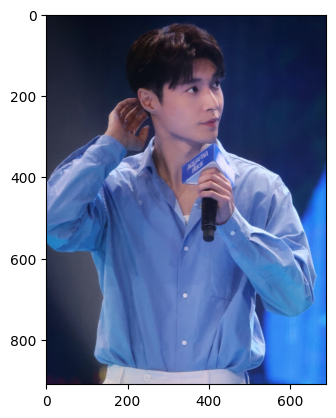

In [27]:
import numpy as np
from torchvision import transforms as T
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import cv2
## 安装cv2包，opencv的Python版
# !pip install opencv-python

p=cv2.imread(r'..\img\6_5_1.jpg', cv2.IMREAD_UNCHANGED)
p = cv2.cvtColor(p, cv2.COLOR_BGR2RGB)
print('p的原始形状',p.shape)
plt.imshow(p)
plt.show()

In [28]:
## 注意和torch张量对象的permute方法配合起来使用
t=T.ToTensor()
## 对于通道在第3维的张量，通过T.ToTensor的对象t进行转换，即可将通道从第3维重排到第1维。
p=t(p)
print('将通道重排到第一维：',p.shape)

将通道重排到第一维： torch.Size([3, 910, 690])


p2的原始形状： torch.Size([3, 182, 138])
p2重排后的形状： torch.Size([182, 138, 3])


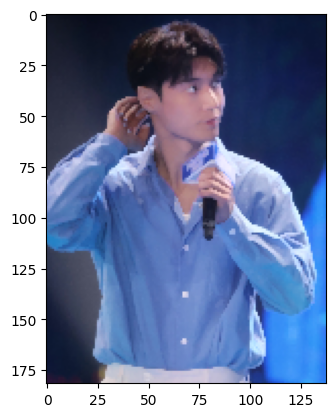

In [29]:
'''
使用torch三通道的池化方法。
调用torch的图像处理相关层，需要对通道的轴进行变换：从第三维转置到第一维。
但是如果需要显示，又要变回去。
测试了一下，平均池化的清晰度明显高于最大池化。
'''
pool2d=nn.MaxPool2d(5)
#pool2d=nn.AvgPool2d(5)
p2=pool2d(p)
'''
注意：torch的池化层的步幅默认是与池化层的size一样。
比如本例中的池化层的size为(5,5)，那么步幅大小就是(5,5)。
'''
print('p2的原始形状：',p2.shape)
'''
注意要将通道从第1维重排到第3维，才能使用matplotlib进行显示。
注意permute方法的强大功能：
（1）0,1,2分别代表张量的第1,2,3维，在permute函数的参数位置则表示该维度在转换后张量中的新维度。
（2）比如0是元组中的第3个元素，那么表示张量中的原来第1个维度重排成转换后张量的第3个维度。
'''
p2=p2.permute((1,2,0))
print('p2重排后的形状：',p2.shape)

## 达到降采样的效果：图片形状模式俱在，但是清晰度明显下降
plt.imshow(p2.numpy())
plt.show()

-----------------

## 6.5.2 填充和步幅

- 与卷积层一样，池化层也可以改变输出形状，该机制是通过填充和步幅以获得所需的输出形状的。
- 使用深度学习框架中内置的二维最大池化层，来演示池化层中填充和步幅的使用。
- 首先构造了一个输入张量`X`，它有**四个维度，其中样本数和通道数都是1**。


In [30]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

- 默认情况下，**深度学习框架中的步幅与池化窗口的大小相同**。
- 因此，如果我们使用形状为`(3, 3)`的池化窗口，那么默认情况下，我们得到的步幅形状为`(3, 3)`。
- MaxPool2d的stride参数：池化操作的步长。可以是单个整数（表示水平和垂直步幅相等）或一个包含两个整数的元组（表示水平和垂直步幅分别为这两个值）。
  - 如果未设置此参数（默认为None），则步幅将**自动设置为kernel_size**。

In [31]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

- 填充和步幅可以手动设定。

In [32]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

- 当然可以**设定一个任意大小的矩形池化窗口，并分别设定填充和步幅的高度和宽度**。


In [33]:
## padding填充的size必须小于等于池化层大小的一半
## padding=(0, 1)填充列而不填充行
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

## 6.5.3 多个通道

- 在处理多通道输入数据时，**池化层在每个输入通道上单独运算**，而不是像**卷积层一样在通道上对输入进行汇总**。
- 这意味着**池化层的输出通道数与输入通道数相同**。
- 下例在通道维度上连结张量`X`和`X + 1`，以构建具有2个通道的输入。


In [34]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

- 如下所示，池化后输出通道的数量仍然是2。


In [35]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

-------------

- **说明：torch.cat()与torch.stack()函数的区别与联系**
  - torch.cat和torch.stack都是PyTorch中用于拼接张量的函数，它们之间有一些相似性，但在操作方式和目的上存在明显区别。
  - torch.cat函数用于将给定的张量沿着指定的维度（轴）拼接。
    - **所有输入张量必须具有相同的形状（除了拼接维度）**。
    - 这意味着，在拼接时，除了指定的拼接维度外，其他维度的大小应保持一致。
  - torch.stack函数用于将给定的张量序列堆叠在一起，**创建一个新的维度**。
    - 所有输入张量必须具有完全相同的形状。
    - 这意味着，在堆叠时，所有维度的大小应保持一致。
  - 区别和联系：
    - 区别：
      - 在torch.cat操作中，输入张量沿指定维度进行拼接，而**不会创建新的维度**。
      - 而在torch.stack操作中，输入张量将沿新的维度进行堆叠，从而**增加一个维度**。
    - 联系：
      - 它们都用于合并多个张量。
      - 但要注意它们对输入张量形状的要求：torch.cat要求除了拼接维度外，其他维度的大小应保持一致，而torch.stack要求所有输入张量具有完全相同的形状。

In [36]:
import torch

# 创建两个形状为(2, 3)的张量
tensor1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor2 = torch.tensor([[7, 8, 9], [10, 11, 12]])

# 使用torch.cat拼接张量
cat_result = torch.cat([tensor1, tensor2], dim=0)
print("torch.cat result:")
# 结果形状为(4, 3)
print(cat_result)

# 使用torch.stack堆叠张量
stack_result = torch.stack([tensor1, tensor2], dim=0)
print("torch.stack result:")
# 结果形状为(2, 2, 3)
print(stack_result)

torch.cat result:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.stack result:
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


---------

## 小结

* 对于给定输入元素，最大池化层会输出该窗口内的最大值，平均池化层会输出该窗口内的平均值。
* 池化层的主要优点之一是减轻卷积层对位置的过度敏感。
* 我们可以指定池化层的填充和步幅。
* 使用最大池化层以及大于1的步幅，可减少空间维度（如高度和宽度）。
* 池化层的输出通道数与输入通道数相同。